In [1]:
from simformer import *
import matplotlib.pyplot as plt
import matplotlib.animation

import numpy as np
import torch

%matplotlib inline

In [2]:
# Load data
x = np.load("data/x.npy")
theta = np.load("data/theta.npy")

data = torch.tensor(np.concatenate([theta, x], axis=1), dtype=torch.float32)

In [3]:
# Define the simformer

# Time steps for the diffusion process
T = 300
t = torch.linspace(0, 1, T)

simformer = Simformer(T, data.shape)

/Users/bguenes/miniconda3/envs/simformer/lib/python3.12/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [7]:
simformer.train(data[:,:100], condition_mask=torch.ones_like(data[:,:100]))

KeyboardInterrupt: 

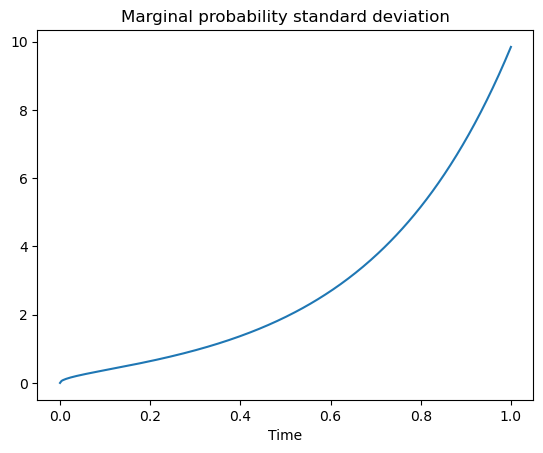

In [5]:
plt.plot(t, simformer.sde.marginal_prob_std(t))
plt.title("Marginal probability standard deviation")
plt.xlabel("Time")
plt.show()

# Animate Diffusion Process
Diffusion process to create the data for score training.

In [5]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

t = torch.linspace(0, 1, T)
color = ['red', 'blue', 'green', 'purple', 'orange', 'black']

def animate(i):
    data_t = simformer.forward_diffusion_sample(data[:,:6], t[i])
    plt.cla()
    for n in range(data_t.shape[1]):
        plt.hist(data_t[:,n], bins=500, range=(-5,15), density=True, alpha=0.5, color=color[n])
    plt.xlim([-5,15])
    plt.ylim([0,1])
    plt.title(f"t={int(i)}")

"""
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=299)

writer = matplotlib.animation.PillowWriter(fps=20,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('../plots/theta_to_noise.gif', writer=writer)
"""
matplotlib.animation.FuncAnimation(fig, animate, frames=10)

In [ ]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

t = torch.linspace(0, 1, T)

def animate2(i):
    data_t = simformer.forward_diffusion_sample(data[:,7:], t[i])
    plt.cla()
    for n in range(data_t.shape[1]):
        plt.hist(data_t[:,n], bins=500, range=(-2,2), density=True, alpha=0.5)
    plt.xlim([-2,2])
    plt.ylim([0,2.5])
    plt.title(f"t={int(i)}")

ani2 = matplotlib.animation.FuncAnimation(fig, animate2, frames=299) 

writer = matplotlib.animation.PillowWriter(fps=20,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani2.save('../plots/x_to_noise.gif', writer=writer)

# Transformer forward pass

In [5]:
torch.ones(data[:10].shape[0],1)*10

tensor([[10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.]])

In [6]:
score = simformer.forward_transformer(data[:10], torch.ones(data[:10].shape[0],1)*10, condition_mask=torch.ones_like(data[:10]))

RuntimeError: The size of tensor a (14) must match the size of tensor b (10) at non-singleton dimension 1

In [ ]:
score.shape

In [ ]:
score